In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data_hplc = pd.DataFrame({'scale': [1,	1,	2,	2,	3,	3,	4,	4,	5,	5,	6,	6,	7,	7,	8,	8,	9,	9,	10,	10,	11,	11,	12,	12,	13,	13],
                          'vessel': ["O_96_0.25",	"O_96_0.25",	"O_96_0.55",	"O_96_0.55",	"O_48_0.29",	"O_48_0.29",	"O_48_0.56",	"O_48_0.56",	"O_24_0.29",	"O_24_0.29",	"O_24_0.56",	"O_24_0.56",	"□_24_0.55",	"□_24_0.55",	"□_24_1.10",	"□_24_1.10",	"T_0.25",	"T_0.25",	"T_0.56",	"T_0.56",	"F_0.25",	"F_0.25",	"F_0.56",	"F_0.56",	"F_1.12",	"F_1.12"],
                          'ERY': [0,	0,	0.682485742367238,	0.539745374719671,	0.670565991267252,	0.797044098536813,	0.573829300662807,	0.935692053587379,	0.900208925455609,	0.897636605309924,	1.86393925943494,	2.01270167579619,	0.472125957098351,	0.537306077063745,	0,	0,	0.326714177450413,	0.316314734805785,	1.14007032690131,	0.998706697021912,	0.324656504937301,	0.478147177796531,	0.845964910179456,	0.90422062454191,	1.12110473992559,	1.05274817250716],
                          'MAN': [0,	0,	0.728872840728205,	0.71936840346914,	0.999500632001313,	1.1108408145763,	4.92683346550735,	4.51883654458295,	4.21288230754655,	3.97425796241714,	5.60380921127946,	6.16317883978955,	4.0773173654659,	4.17461086077335,	0,	0,	0.358907854978449,	0.326203641144429,	1.40573902268395,	1.28779353993668,	1.36389294449668,	1.51979626394819,	2.94977774438496,	2.81641674974548,	1.31970381207437,	1.44685182901915],
                          'CA': [0,	0,	0.483701310469734,	0.423706103924822,	0.382216810392963,	0.478019480612761,	0.467558482716349,	0.385083110688221,	0.313957921474518,	0.341196710470746,	0.641677255576111,	0.815339537191298,	0,	0,	0,	0,	0.354158505852974,	0.292907081875059,	0.687941592751435,	0.653987280214229,	0.345904679430385,	0.327601771898057,	0,	0,	0.729234115804932,	0.709534451562692],
                          '% consumed GLY': [29.0250157675576,	27.5154599233521,	33.2827606929065,	31.0044074638739,	43.5839303026593,	37.5968375175949,	98.4775046147802,	98.5766631846862,	69.3035405536721,	74.9004366591758,	100,	100,	78.5464178931004,	77.9316825034497,	100,	100,	0.38833439063314,	6.54301223631286,	43.355814857921,	35.4472534213869,	16.9192130478563,	20.0936820442251,	28.8310430963686,	32.0804430122482,	43.9322106606102,	34.7980861109465]})

data_hplc_stat = data_hplc.groupby(['scale', 'vessel']).agg({'ERY': ['mean', 'std'], 'MAN': ['mean', 'std'], 'CA': ['mean', 'std'], 
                                                  '% consumed GLY': ['mean', 'std']}).reset_index()
data_hplc_stat.sort_values(by='scale', inplace=True)

print(data_hplc_stat)

   scale     vessel       ERY                 MAN                  CA  \
                         mean       std      mean       std      mean   
0      1  O_96_0.25  0.000000  0.000000  0.000000  0.000000  0.000000   
1      2  O_96_0.55  0.611116  0.100933  0.724121  0.006721  0.453704   
2      3  O_48_0.29  0.733805  0.089434  1.055171  0.078729  0.430118   
3      4  O_48_0.56  0.754761  0.255876  4.722835  0.288497  0.426321   
4      5  O_24_0.29  0.898923  0.001819  4.093570  0.168733  0.327577   
5      6  O_24_0.56  1.938320  0.105191  5.883494  0.395534  0.728508   
6      7  □_24_0.55  0.504716  0.046089  4.125964  0.068797  0.000000   
7      8  □_24_1.10  0.000000  0.000000  0.000000  0.000000  0.000000   
8      9     T_0.25  0.321514  0.007354  0.342556  0.023125  0.323533   
9     10     T_0.56  1.069389  0.099959  1.346766  0.083400  0.670964   
10    11     F_0.25  0.401402  0.108534  1.441845  0.110240  0.336753   
11    12     F_0.56  0.875093  0.041193  2.883097  

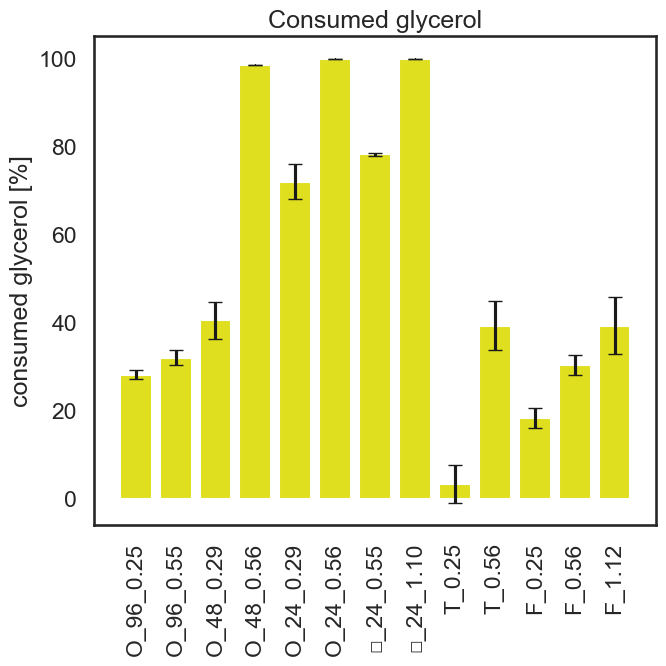

In [32]:
gly = data_hplc_stat['% consumed GLY', 'mean']
vessel = data_hplc_stat['vessel']
error = data_hplc_stat['% consumed GLY', 'std']

sns.set_theme(style="white", context="talk")
plt.figure(figsize=(7,7))

sns.barplot(data_hplc_stat, x = vessel, y = gly, color='yellow')
plt.errorbar(x=vessel, y=gly, yerr=error, fmt = ', k', capsize = 5)

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('consumed glycerol [%]')
plt.title('Consumed glycerol')
plt.tight_layout()

plt.savefig('consumed_gly')

In [3]:
data_hplc2 = pd.DataFrame({'scale': [1,	1,	2,	2,	3,	3,	4,	4,	5,	5,	6,	6,	7,	7,	8,	8,	9,	9,	10,	10,	11,	11,	12,	12,	13,	13,
1,	1,	2,	2,	3,	3,	4,	4,	5,	5,	6,	6,	7,	7,	8,	8,	9,	9,	10,	10,	11,	11,	12,	12,	13,	13,
1,	1,	2,	2,	3,	3,	4,	4,	5,	5,	6,	6,	7,	7,	8,	8,	9,	9,	10,	10,	11,	11,	12,	12,	13,	13],
                           'vessel': ["O_96_0.25",	"O_96_0.25",	"O_96_0.55",	"O_96_0.55",	"O_48_0.29",	"O_48_0.29",	"O_48_0.56",	"O_48_0.56",	"O_24_0.29",	"O_24_0.29",	"O_24_0.56",	"O_24_0.56",	"□_24_0.55",	"□_24_0.55",	"□_24_1.10",	"□_24_1.10",	"T_0.25",	"T_0.25",	"T_0.56",	"T_0.56",	"F_0.25",	"F_0.25",	"F_0.56",	"F_0.56",	"F_1.12",	"F_1.12",
"O_96_0.25",	"O_96_0.25",	"O_96_0.55",	"O_96_0.55",	"O_48_0.29",	"O_48_0.29",	"O_48_0.56",	"O_48_0.56",	"O_24_0.29",	"O_24_0.29",	"O_24_0.56",	"O_24_0.56",	"□_24_0.55",	"□_24_0.55",	"□_24_1.10",	"□_24_1.10",	"T_0.25",	"T_0.25",	"T_0.56",	"T_0.56",	"F_0.25",	"F_0.25",	"F_0.56",	"F_0.56",	"F_1.12",	"F_1.12",
"O_96_0.25",	"O_96_0.25",	"O_96_0.55",	"O_96_0.55",	"O_48_0.29",	"O_48_0.29",	"O_48_0.56",	"O_48_0.56",	"O_24_0.29",	"O_24_0.29",	"O_24_0.56",	"O_24_0.56",	"□_24_0.55",	"□_24_0.55",	"□_24_1.10",	"□_24_1.10",	"T_0.25",	"T_0.25",	"T_0.56",	"T_0.56",	"F_0.25",	"F_0.25",	"F_0.56",	"F_0.56",	"F_1.12",	"F_1.12"],
                           'metabolite': ["CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",	"CA",
"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",	"MAN",
"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY",	"ERY"],
                           'concentration': [0,	0,	0.483701310469734,	0.423706103924822,	0.382216810392963,	0.478019480612761,	0.467558482716349,	0.385083110688221,	0.313957921474518,	0.341196710470746,	0.641677255576111,	0.815339537191298,	0,	0,	0,	0,	0.354158505852974,	0.292907081875059,	0.687941592751435,	0.653987280214229,	0.345904679430385,	0.327601771898057,	0,	0,	0.729234115804932,	0.709534451562692,
0,	0,	0.728872840728205,	0.71936840346914,	0.999500632001313,	1.1108408145763,	4.92683346550735,	4.51883654458295,	4.21288230754655,	3.97425796241714,	5.60380921127946,	6.16317883978955,	4.0773173654659,	4.17461086077335,	0,	0,	0.358907854978449,	0.326203641144429,	1.40573902268395,	1.28779353993668,	1.36389294449668,	1.51979626394819,	2.94977774438496,	2.81641674974548,	1.31970381207437,	1.44685182901915,
0,	0,	0.682485742367238,	0.539745374719671,	0.670565991267252,	0.797044098536813,	0.573829300662807,	0.935692053587379,	0.900208925455609,	0.897636605309924,	1.86393925943494,	2.01270167579619,	0.472125957098351,	0.537306077063745,	0,	0,	0.326714177450413,	0.316314734805785,	1.14007032690131,	0.998706697021912,	0.324656504937301,	0.478147177796531,	0.845964910179456,	0.90422062454191,	1.12110473992559,	1.05274817250716]})



print(data_hplc2)

    scale     vessel metabolite  concentration
0       1  O_96_0.25         CA       0.000000
1       1  O_96_0.25         CA       0.000000
2       2  O_96_0.55         CA       0.483701
3       2  O_96_0.55         CA       0.423706
4       3  O_48_0.29         CA       0.382217
..    ...        ...        ...            ...
73     11     F_0.25        ERY       0.478147
74     12     F_0.56        ERY       0.845965
75     12     F_0.56        ERY       0.904221
76     13     F_1.12        ERY       1.121105
77     13     F_1.12        ERY       1.052748

[78 rows x 4 columns]


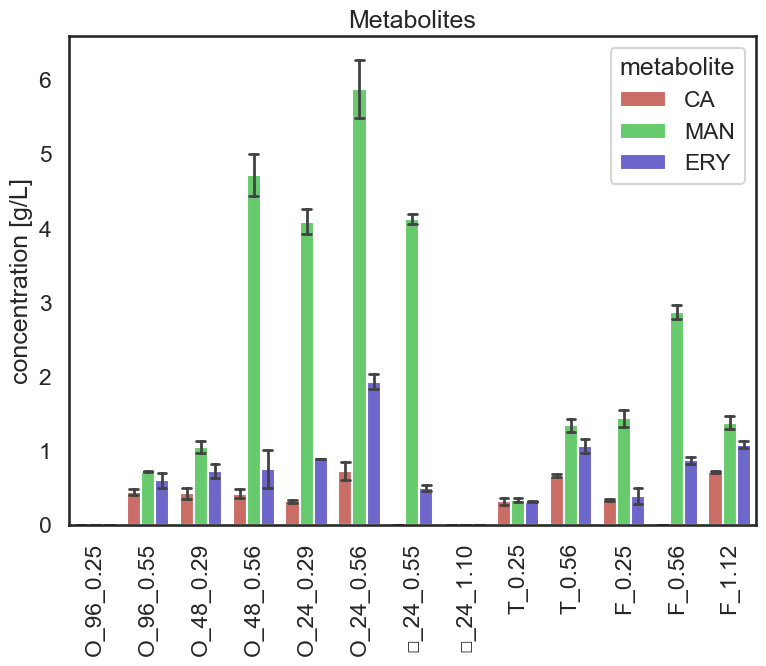

In [25]:
x = data_hplc2['vessel']
y = data_hplc2['concentration']

sns.set_theme(style="white", context="talk")

plt.figure(figsize=(8,7))
sns.barplot(data_hplc2, x=x, y=y, hue = 'metabolite', palette='hls', errorbar='sd', capsize=0.5, err_kws={'linewidth': 2})
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('concentration [g/L]')
plt.title('Metabolites')
plt.tight_layout()

plt.savefig('metabolites')
